# Required packages

In [1]:
import numpy as np
import pandas as pd

from termcolor import colored

# Construct ID3

In [2]:
ID3 = pd.read_pickle(f"./ID3.pkl")

ID3 = ID3.dropna(axis = 0)

ID3 = ID3.set_index(pd.DatetimeIndex(ID3['Instrument']))

print(ID3)

                         ID3          Instrument
Instrument                                      
2010-01-06 10:00:00  57.4082 2010-01-06 10:00:00
2010-01-06 11:00:00   56.625 2010-01-06 11:00:00
2010-01-06 12:00:00  56.5556 2010-01-06 12:00:00
2010-01-06 13:00:00  56.6667 2010-01-06 13:00:00
2010-01-06 14:00:00  63.5714 2010-01-06 14:00:00
...                      ...                 ...
2019-11-27 21:00:00  43.8493 2019-11-27 21:00:00
2019-11-27 22:00:00  47.5103 2019-11-27 22:00:00
2019-11-27 23:00:00  48.6807 2019-11-27 23:00:00
2019-11-28 00:00:00  50.6827 2019-11-28 00:00:00
2019-11-28 01:00:00  40.2498 2019-11-28 01:00:00

[56207 rows x 2 columns]


# Data processing

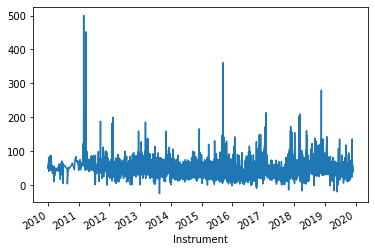

In [3]:
ID3['ID3'].plot();

# Create train and test set

In [4]:
def ts_train_test(ID3, time_steps, for_periods):

    # Create training and test sets
    mask = (ID3.index.year <= 2018)
    ts_train = ID3.loc[mask]['ID3'].values
    ts_train = ts_train.reshape(1, -1).transpose()

    mask = (ID3.index.year == 2019)
    ts_test = ID3.loc[mask]['ID3'].values
    ts_test = ts_test.reshape(1, -1).transpose()

    # ts_train = ID3[:'2018'].iloc['ID3'].values
    # ts_test  = ID3['2019':].iloc['ID3'].values

    # Scale the data
    from sklearn.preprocessing import MinMaxScaler
    sc = MinMaxScaler(feature_range=(0,1))
    ts_train_unscaled = ts_train
    ts_train = sc.fit_transform(ts_train)

    # Create training data of s samples and t time steps
    X_train = []
    y_train = []
    y_train_stacked = []
    
    for i in range(time_steps, len(ts_train)-1): 
        X_train.append(ts_train[i-time_steps:i,0])
        y_train.append(ts_train[i:i+for_periods,0])
    X_train, y_train = np.array(X_train), np.array(y_train)

    # Reshape X_train for efficient modelling
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

    # Prepare to create X_test
    inputs = pd.concat((ID3['ID3'][:'2018'], ID3['ID3']['2019':]),axis=0).values
    inputs = inputs[len(inputs)-len(ts_test) - time_steps:]
    inputs = inputs.reshape(-1,1)
    inputs  = sc.transform(inputs)

    X_test = []
    for i in range(time_steps, len(ts_test)+time_steps-for_periods):
        X_test.append(inputs[i-time_steps:i,0])
        
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

    return X_train, y_train , X_test, sc

##########################################################################
X_train, y_train, X_test, sc = ts_train_test(ID3, 5, 2)
##########################################################################

X_train.shape[0], X_train.shape[1]

print(X_train)

[[[0.15696793]
  [0.15547619]
  [0.15534392]
  [0.15555556]
  [0.16870748]]

 [[0.15547619]
  [0.15534392]
  [0.15555556]
  [0.16870748]
  [0.15603499]]

 [[0.15534392]
  [0.15555556]
  [0.16870748]
  [0.15603499]
  [0.15991342]]

 ...

 [[0.16510045]
  [0.16906625]
  [0.18166121]
  [0.18065726]
  [0.17759596]]

 [[0.16906625]
  [0.18166121]
  [0.18065726]
  [0.17759596]
  [0.15112702]]

 [[0.18166121]
  [0.18065726]
  [0.17759596]
  [0.15112702]
  [0.15833203]]]


In [5]:
time_steps = 5
for_periods = 2

# Create training and test sets
mask = (ID3.index.year == 2018)
ts_train = ID3.loc[mask]['ID3'].values
ts_train = ts_train.reshape(1, -1).transpose()

mask = (ID3.index.year == 2019)
ts_test = ID3.loc[mask]['ID3'].values
ts_test = ts_test.reshape(1, -1).transpose()

# Scale the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))

ts_train_unscaled = ts_train
ts_train = sc.fit_transform(ts_train)

# Create training data of s samples and t time steps
X_train = []
y_train = []
y_train_stacked = []

for i in range(time_steps, len(ts_train)-1): 
    X_train.append(ts_train[i-time_steps:i,0])
    y_train.append(ts_train[i:i+for_periods,0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Prepare to create X_test
inputs = pd.concat((ID3['ID3'][:'2018'], ID3['ID3']['2019':]),axis=0).values
inputs = inputs[len(inputs)-len(ts_test) - time_steps:]
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

X_test = []
for i in range(time_steps, len(ts_test)+time_steps-for_periods):
    X_test.append(inputs[i-time_steps:i,0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

X_train.shape[0], X_train.shape[1]

print(X_train)

[[[0.10577693]
  [0.10038925]
  [0.13130964]
  [0.13052401]
  [0.12952567]]

 [[0.10038925]
  [0.13130964]
  [0.13052401]
  [0.12952567]
  [0.13199296]]

 [[0.13130964]
  [0.13052401]
  [0.12952567]
  [0.13199296]
  [0.13441954]]

 ...

 [[0.26474828]
  [0.27177694]
  [0.29409922]
  [0.29231989]
  [0.2868943 ]]

 [[0.27177694]
  [0.29409922]
  [0.29231989]
  [0.2868943 ]
  [0.23998293]]

 [[0.29409922]
  [0.29231989]
  [0.2868943 ]
  [0.23998293]
  [0.25275249]]]


# Convert to printable

In [6]:
# Convert the 3-D shape of X_train to a data frame so we can see: 
X_train_see = pd.DataFrame(np.reshape(X_train, (X_train.shape[0], X_train.shape[1])))
y_train_see = pd.DataFrame(y_train)
pd.concat([X_train_see, y_train_see], axis=1)

# Convert the 3-D shape of X_test to a data frame so we can see: 
X_test_see = pd.DataFrame(np.reshape(X_test, (X_test.shape[0], X_test.shape[1])))
pd.DataFrame(X_test_see)

print(), print(colored(f'There are {X_train.shape[0]} samples in the training data', 'green'))
print(colored(f'There are {X_test.shape[0]} samples in the test data', 'green')), print()

print(X_train_see)
print(y_train_see)


There are 8596 samples in the training data
There are 7808 samples in the test data

             0         1         2         3         4
0     0.105777  0.100389  0.131310  0.130524  0.129526
1     0.100389  0.131310  0.130524  0.129526  0.131993
2     0.131310  0.130524  0.129526  0.131993  0.134420
3     0.130524  0.129526  0.131993  0.134420  0.138721
4     0.129526  0.131993  0.134420  0.138721  0.141799
...        ...       ...       ...       ...       ...
8591  0.266781  0.265300  0.264748  0.271777  0.294099
8592  0.265300  0.264748  0.271777  0.294099  0.292320
8593  0.264748  0.271777  0.294099  0.292320  0.286894
8594  0.271777  0.294099  0.292320  0.286894  0.239983
8595  0.294099  0.292320  0.286894  0.239983  0.252752

[8596 rows x 5 columns]
             0         1
0     0.131993  0.134420
1     0.134420  0.138721
2     0.138721  0.141799
3     0.141799  0.141316
4     0.141316  0.140485
...        ...       ...
8591  0.292320  0.286894
8592  0.286894  0.239983
8593

# LSTM

In [7]:
def LSTM_model(X_train, y_train, X_test, sc):
    # create a model
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN, GRU, LSTM
    from keras.optimizers import SGD, Adam
    
    model_lstm = Sequential()
    model_lstm.add(LSTM(units = 200, return_sequences = True, input_shape=(X_train.shape[1],1), activation='tanh'))
    model_lstm.add(LSTM(units = 100, return_sequences = True))
    model_lstm.add(LSTM(units = 50, return_sequences = False))
    
    model_lstm.add(Dense(units = 1, activation='linear'))

    optimizer = Adam(clipvalue=0.5)
    # model_lstm.compile(loss = 'mse', optimizer=optimizer)

    # Compiling
    model_lstm.compile(optimizer=optimizer,loss='mean_squared_error')
    # Fitting to the training set
    model_lstm.fit(X_train,y_train,epochs=50,batch_size=16, verbose=5)

    LSTM_prediction = model_lstm.predict(X_test)
    LSTM_prediction = sc.inverse_transform(LSTM_prediction)

    # self.model = model_lstm

    return model_lstm, LSTM_prediction

my_LSTM_model, LSTM_prediction = LSTM_model(X_train, y_train, X_test, sc)

Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50


In [10]:
def actual_pred_plot(preds):

    actual_pred = pd.DataFrame()

    mask = (ID3.index.year == 2019)
    actual_pred['Actual'] = ID3.loc[mask]['ID3'][0:len(preds)]
    actual_pred['Predicted'] = preds[:, 0]

    from keras.metrics import MeanSquaredError
    m = MeanSquaredError()
    actual_pred['Actual'] = actual_pred['Actual'].astype(int)
    actual_pred['Predicted'] = actual_pred['Predicted'].astype(int)
    m.update_state(np.array(actual_pred['Actual']), np.array(actual_pred['Predicted']))
    
    return (m.result().numpy(), actual_pred)

m, actual_pred = actual_pred_plot(LSTM_prediction)

In [13]:
def smape(a, f):
    return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)

smape(actual_pred['Actual'], actual_pred['Predicted'])

6.43485830402117